# Домашнее задание 5

(прислать до 02:00 17.03.2020)

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1 (5 pts)

Упражнение 2.1. из книги лектора.  

In [0]:
# Место для Вашего решения

$1.$

Докажем, что оценка $f(\bar x_N) - f(x_*) \leq \frac{LR^2}{N} + \delta, L = L_{\nu}\frac{L_{\nu}(1-\nu)}{(1+\nu)2\delta}^{\frac{1-\nu}{1+\nu}}$ при $\nu = 0$ имеет вид $f(\bar x_N) - f(x_*) \leq \frac{L_0R}{\sqrt{N}}$. Запишем правую часть неравенства как функцию от $h$: $\frac{R^2}{2hN}+\frac{hL_0}{2}$, найдем минимум по $h$: $-\frac{R^2}{2h^2N}+\frac{L_0^2}{2} = 0 \Rightarrow h = \frac{R}{L_0\sqrt{N}}$. Подставляя получанный шаг в исходную оценку, получаем $f(\bar x_N) - f(x_*) \leq \frac{L_0R}{\sqrt{N}}.$

Покажем теперь, что для класса задач, у которых $f$ - выпукла и $\|\nabla f(x)\|_2 \leq L_0$ данный класс методов с таким подбором шага является оптимальным с точностью до константы (то есть докажем нижнюю оценку $f(\bar x_N) - f(x_*) \geq \frac{L_0R}{\sqrt{N}c}, c = const.$

$2.$

Будем рассматривать класс задач с $f(x)$ - выпуклой и липшицевой ($|f(y)-f(x)| \leq M\|x-y\|_2 \Rightarrow \|\nabla f(x)\|_2 \leq M)$.

Рассмотрим класс "плохих" функций: $f_k(x) = \gamma \max\limits_{1\leq i \leq k}x_i + \frac{\mu}{2}\|x\|_2^2.$ $\partial f_k(x) = \mu x+conv\{\cup e_i|i \in I(x)\}, I(x) = \{j|1\leq j \leq k, x_j = \max x_i\}$ (по теореме Дуюбовицкого-Милютина).

Не умаляя общности, положим $x_0 = 0$ (если $x_0$ не равно нулю, делаем сдвиг).

Оценим норму субдифференциала функции: $h(x) \in conv\{\cup e_i|i \in I(x)\} \Rightarrow h(x) = (\alpha_1, \dots, \alpha_n)^T, \alpha_i \geq 0, \sum \alpha_i = 1 \Rightarrow \|h(x)\|_2 = (\sum \alpha_i)^2 \leq \sum(\alpha_i^2) \leq 1$, получаем,что $\forall x\in B(0,p)\hookrightarrow g_k(x) \in \partial f_k(x) \Rightarrow \|g(x)\| \leq \mu p + \gamma.$

Получается: $\forall x,y \in B(o,p),p\in \mathbb{R}, \forall g_k(y) \in \partial f_k(y) \hookrightarrow f_k(y)-f_k(x) \leq \langle g_k(y), y-x\rangle \leq \|g_k(y)\|_2 \|x-y\|_2 \leq (\mu p +\gamma)\|y-x\|$. То есть $f_k(x)$ на множестве $B(o,p)$ липшицева с константой липшица $\mu p+\gamma$.


Заметим,что $ x_k^*: x_{ki}^* = \begin{equation*}
 \begin{cases}
   -\frac{\gamma}{k\mu}&{1\leq i \leq k}\\
   0 & {n \geq i > k}
 \end{cases}
\end{equation*}$ - точка минимум функции $f_k(x)$, так как $ 0 \in \partial f_k(x_k^*)$, $R_k = \|x_k* - x_0\| = \|x_k^*\| = \frac{\gamma}{\mu \sqrt{N}}, f_k(x_k^*) = -\frac{\gamma^2}{2\mu k}$.

Теперь сконструируем оракул таким образом, чтобы на каждой итерации он выдавал наиходшее (самое не выгодное) значение субградиент из субдифференциала.

Пусть оракул на каждой итерации получает на вход точку $x \in \mathbb{R}$, находит ее максимальную координату $x_f$ с минимальным порядковым номером, и возвращает $f_k = \gamma x_f +\frac{\mu}{2}\|x\|_2^2, g_k = \gamma e_f+ \mu x \in \partial f_k(x)$

Таким образом можем построить последовательность $x_k$: $x_0 = 0,g_0 = \gamma e_1, x_1: x_1^(1) = -\alpha \gamma, x_1^(i) = 0, \forall i\in [2,n]$. Получается, что начальное значение функции на $i+1$-ой итерации: $f_{k}(x_{i}) = \max x_i^{(j)} = 0.$ Следовательно, для $i, 1 \leq i \leq k − 1$, мы не сможем
улучшить начальное значение целевой функции. Именно поэтому, оракул, сконструированный таким образом будет выдавать худший субградиент, то есть будет строить худшую последовательность точкек $x_i$ с целью получить как можно более медленную скорость сходимости. Таким образом, $f_{K+1}(x_k) \geq 0 \Rightarrow f_{k+1}(x_k) - f_{k+1}(x_k^*) \geq f_{k+1}(x_k^*) = \frac{\gamma}{2\mu (k+1)}.$

Теперь положим $f(x) = f_{N+1}(x), \gamma = \frac{\sqrt{N+1}M}{1+\sqrt{N+1}}, \mu = \frac{M}{(1+\sqrt{N+1})R}$, где параметры $M$ и $R$ для данного класса задач зафиксированы (получается, что $\gamma + \mu R = M$ - константа липшица, $R = p$). Получаем нижнюю оценку: $f(x) - f(x_*) \geq \frac{MR}{2(1+\sqrt{N+1)}}$. Посмотрев на пункт $1$ и приняв $M = L_0$, убеждаемся в том, что метод является оптимальным в данном классе задач с точностью то числовой константы. 



## Задача 2 (5 pts)

- (0.5 pts) Пусть Вам дано $m$ векторов из $\mathbb{R}^n$, про которых известно что они сгенерированы из некоторого нормального распределения с параметрами $(\mu, \Sigma)$. Более того, известно, что $\Sigma^{-1}$ разрежена, то есть много пар компонент векторов условно независимы. Сгенерируйте данные, которые удовлетворяют этим требованиям для $n = 100$ и $m = 500$. Если последующие пункты будут долго считаться, уменьшите эти параметры
- (1 pts) Теперь поставьте задачу поиска оценки матрицы $\Sigma^{-1}$ на основе оценки максимального правдоподобия
- Добавьте к Вашей постановке ограничение на то, что матрица $\Sigma^{-1}$ разрежена. Это делается добавлением к целевой функции слагаемого вида $\lambda \sum_{i < j} |(\Sigma^{-1})_{ij}|$, то есть аналог $\ell_1$ регуляризации для задачи наменьших квадратов, только теперь у нас разрежен не вектор, а матрица
- (1 pts) Получите выражение для проксимального оператора для функции $\lambda \sum_{i < j} |(\Sigma^{-1})_{ij}|$
- (1 pts) Сравните сходимость субградиентного метода и проксимального градиентного метода для этой задачи
- (1 pts) Проанализируйте как влияет значение параметра $\lambda$ на близость решения к точному значению матрицы, которое использовалось при генерации данных
- (0.5 pts) Сравните скорость решения рассмотренными методами со скоростью решения с помощью CVXPy

In [0]:
# Место для Вашего решения
import numpy as np
from scipy import sparse
import scipy
n = 100
m = 500
mu = scipy.random.rand(n)

def sparseSym(size, density=0.05):
  A = sparse.random(size, size, density=density)
  return (A @ A.transpose())/2

In [111]:
sigma = sparseSym(n).A
print(sigma.shape)
print(np.sum(sigma == 0))

(100, 100)
7773


In [0]:
vectors = scipy.random.multivariate_normal(mu, sigma ,m)

$2.$

$f_\Sigma = \frac{1}{(2\pi)^{n/2}(\det \Sigma)^{1/2}}exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu))$.

Хотим оценить параметр $\Sigma \Rightarrow \mathcal{L}(\hat{\Sigma},\mu) = \prod\limits_{i = 1}^n p(\hat{\Sigma}, \mu|y_i).$ Вероятность распадается в произведение, потому что матрица ковариации разрежена, следувательно векторы можно считать не коррелированными, следовательно, независимыми (так как векторы из нормального распределения).

$ \mathcal{L}(\hat{\Sigma^{-1}},\mu) = \prod\limits_{i = 1}^m p(\hat{\Sigma},\mu|y_i) = \prod\limits_{i = 1}^m(\frac{(\det \hat{\Sigma^{-1}})^{1/2}}{(2\pi)^{n/2}}exp(-\frac{1}{2}(y_i-\mu)^T\hat{\Sigma^{-1}}(y_i-\mu))) \propto \det (\hat{\Sigma^{-1}})^{m/2} exp(-\frac{1}{2}\sum\limits_{i=1}^m(y_i-\mu)^T\hat{\Sigma^{-1}}(y_i-\mu))).$. 

Теперь навесим операцию взятия следа на скаляр и сделаем перестановку:

$\mathcal{L}(\hat{\Sigma^{-1}}) = \det (\hat{\Sigma^{-1}})^{m/2} exp(-\frac{1}{2}\sum\limits_{i=1}^mtr((y_i-\mu)^T\hat{\Sigma^{-1}}(y_i-\mu)))) = \det (\hat{\Sigma^{-1}})^{m/2} exp(-\frac{1}{2}tr(\sum\limits_{i=1}^m((y_i-\mu)(y_i-\mu)^T\hat{\Sigma^{-1}}))) $. 


Взяв логарифм и продифференцировав полученное выражение получаем, что производная логарифма максимального правдоподобия обращается в ноль при $\hat{\mu} = \bar y_m, \frac{\partial \log \mathcal{L} }{\partial \hat{\Sigma^{-1}}} = 0 \Rightarrow  \hat{\Sigma } = \frac{1}{m}\sum\limits_{i=1}^m(y_i-\bar y)(y_i-\bar y)^T$.

Задача:

$$\max\limits_{\hat{\Sigma^{-1}}}\log \mathcal{L}(\hat{\Sigma^{-1}})$$

$3.$

Добавляя регуляризацию:

$$\min\limits_{\hat{\Sigma^{-1}}}(-\log \mathcal{L}(\hat{\Sigma^{-1}})+\lambda \sum_{i < j} |(\Sigma^{-1})_{ij}|)$$
$$\lambda>0$$


$4.$

$prox_{\alpha f}(B) = argmin_{A} (\lambda \sum\limits_{i<j}|A_{ij}|+\frac{1}{2\alpha}\|B-A\|_2)$


$prox_{\alpha f}(B)_{ij} = \begin{equation*}
 \begin{cases}
   \arg \min\limits_{A} \lambda |A_{ij}| + \frac{1}{2\alpha}(A_{ij}-B_{ij})^2&{i<j}\\
   \arg \min\limits_{A}\frac{1}{2\alpha}(A_{ij}-B_{ij})^2 & {i \geq j}
 \end{cases}
\end{equation*} $

$prox_{\alpha f}(B)_{ij}  = \begin{equation*}
 \begin{cases}
   \begin{cases}
   B_{ij} - \lambda \alpha, &{B_{ij} \geq \lambda \alpha}\\
   0,&|B_{ij}| \leq \lambda \alpha\\
   B_{ij} + \lambda \alpha, &{B_{ij} \leq - \lambda \alpha}
 \end{cases}&{i<j}\\
   B_{ij}. & {i \geq j}
 \end{cases}
\end{equation*} = $ $\begin{equation*}
 \begin{cases}
   sign(B_{ij})(|B_{ij}| - \lambda \alpha)_+,&{i<j}\\
   B_{ij}. & {i \geq j}
 \end{cases}
\end{equation*} $



In [113]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18,14))



!pip install git+https://github.com/amkatrutsa/liboptpy
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss


  Cloning https://github.com/amkatrutsa/liboptpy to /tmp/pip-req-build-4a3ff_ql
  Running command git clone -q https://github.com/amkatrutsa/liboptpy /tmp/pip-req-build-4a3ff_ql
  Created wheel for liboptpy: filename=liboptpy-0.0.1-cp36-none-any.whl size=11730 sha256=f4da93742c1a2b81f32831000890df348c79fb188edadf98d6077c9b4620a6de
  Stored in directory: /tmp/pip-ephem-wheel-cache-sdrzr7qe/wheels/8e/6e/38/60496dcf12f2c341e42d932d1403bdaaa17049556fdaba8d40
Successfully built liboptpy


<Figure size 1296x1008 with 0 Axes>

In [0]:
def prox_alg(f, f_grad, g_prox, x0, num_iter, beta=0.5, fix_lam=None, accel=False):
    conv = [x0]
    x = x0.copy()
    if accel:
        t_prev = 1
        t_next = (1 + np.sqrt(1 + 4 * t_prev**2)) / 2.
    if fix_lam is None:
        lam = 1.
    for i in range(num_iter):
        if accel and i > 0:
            x = x + (t_prev - 1) / t_next * (x - conv[-2])
            t_prev = t_next
            t_next = (1 + np.sqrt(1 + 4 * t_prev**2)) / 2.
        if fix_lam is None:
            while True:
                z = g_prox(x - lam * f_grad(x), lam)
                if f(z) <= f(x) + f_grad(x).dot(z - x) + np.linalg.norm(z - x)**2 / (2 * lam):
                    break
                else:
                    lam = lam * beta
        else:
            z = g_prox(x - fix_lam * f_grad(x), fix_lam)
        x = z.copy()
        conv.append(x)
    return x, conv



In [0]:
def g_prox(B, lam):
  prox = 0
  for i in range(B.shape[1]):
    for j in range(i,B.shape[0]):
      prox= prox+ B[j, i]
  for j in range(B.shape[0]):
    for i in range(j+1, B.shape[0]):
      prox=prox + np.sign(B[j,i]) * np.maximum(np.abs(B[j,i]) - lam * gamma, 0)
  return prox

In [0]:
mu_ = np.mean(vectors, axis = 0)
S = (vectors - np.array(list(mu_)*m).reshape(m,n)).T @ (vectors - np.array(list(mu_)*m).reshape(m,n))

In [0]:
#A = sigma in -1
f = lambda A : m/2 * np.log(np.linalg.det(A))-0.5* np.trace(S @ A)

f_grad = lambda A: m/2 * np.linalg.inv(A) - 0.5 * S

In [0]:
X0 = np.random.rand(n,n)
gamma = 1

In [119]:
prox_alg(f, f_grad, g_prox, X0, num_iter = 100, beta=0.5, fix_lam=None, accel=False)

LinAlgError: ignored

## Задача 3 (4 pts)

- (2 pts) Покажите, что точка минимума $x^*$ выпуклой функции $f(x)$ является неподвижной точкой проксимального оператора, то есть

$$
x^* = prox_f(x^*)
$$

- (2 pts) Сравните сходимость (по итерациям и по времени) проксимального метода и градиентного спуска для задачи

 $$
 \min \frac{1}{2}x^\top A x - b^{\top}x,
 $$
 
 где $A \in \mathbb{S}^N_+$, при увеличении размера шага. Убедитесь, что градиентный спуск начинает расходиться, а проксимальный метод – нет. Как увеличение шага влияет на сходимость проксимального метода?

In [0]:
# Место для Вашего решения

$1.$

$\Rightarrow$ Покажем, что если точка $x^*$ является точкой минимумом функции $f(x^*)$, тогда $prox_f(x^*) = x^*$. Действительно, $f(x^*) \leq f(x), \forall x \Rightarrow f(x)+\frac{1}{2}\|x-x^*\|_2^2 \geq f(x^*) +\frac{1}{2}\|x^* -x^*\|_2^2, \forall x \Rightarrow prox_f(x^*) = x^*$, то есть $x^*$ - точка минимума функции $f(x) + (1/2)\|x-x^*\|_2^2$.

$\Leftarrow$ Обратно: если $prox_f(y) = y,$ то есть $y = \arg \min\limits_{x}(f(x) + (1/2)\|x-y\|_2^2) \Leftrightarrow y = prox_f(v) \Leftrightarrow 0 \in \partial f(y) +(y-v)$. При $y = x^*=v$ получаем, что $0 \in partial f(x^*) \Rightarrow$ $x^*$ - точка минимума $f(x)$.

$2.$



In [0]:


n = 20
A = np.diag(np.random.rand(n))
U = np.random.rand(n, n)
Q, _ = np.linalg.qr(U)
A = Q.dot(A).dot(Q.T)
b = np.random.rand(n)
f = lambda x: 0.5*x.T @ A @ x - b.T @ x
grad_f = lambda x: A @ x - b
x0 = np.random.rand(n)

In [0]:
def prox_alg(f, f_grad, g_prox, x0, epsilon = 1e-4, num_iters = 500, fix_lam=None):
    conv = [x0]
    x = x0.copy()
    iters = 0
    norm = np.linalg.norm(grad_f(x0))
    if fix_lam is None:
        lam = 1.
    while norm > epsilon and iters <num_iters:
        z = g_prox(x, fix_lam)
        x = z.copy()
        conv.append(x)
        norm = np.linalg.norm(grad_f(x))
        iters = iters+1

    return x, conv

In [0]:
def grad_descent(x0, f,grad_f, alpha, num_iters = 500, epsilon = 1e-4):
  x = x0.copy()
  norm = np.linalg.norm(grad_f(x0))
  norms = []
  iters = 0
  norms.append(x0)
  while norm > epsilon and iters < num_iters:
    x = x - grad_f(x)*alpha
    norm = np.linalg.norm(grad_f(x))
    norms.append(x)
    iters = iters+1

  return norms


In [0]:
def g_prox(z,lam):
   return z + np.linalg.inv((A+(1/lam)*np.eye(n))) @ (b-A@z)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in multiply
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in matmul
  # Remove the CWD from sys.path while we load stuff.


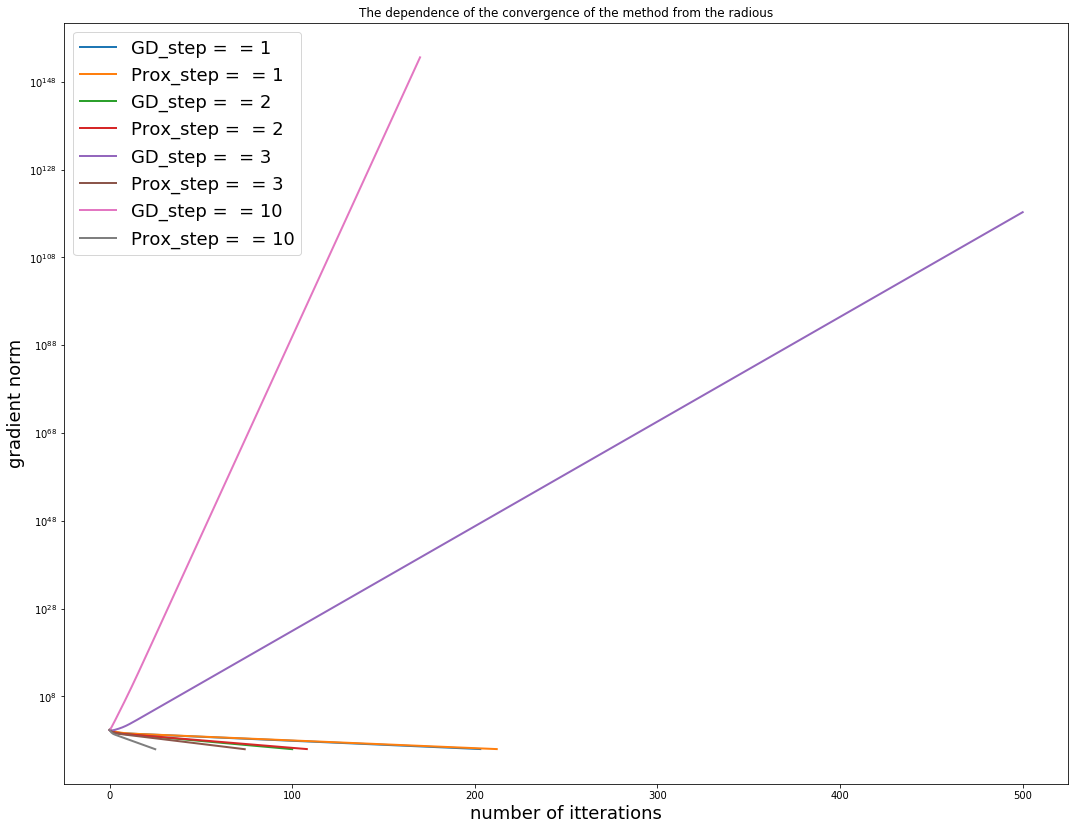

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
steps = np.array([1,2,3,10])
gds = []
plt.figure(figsize=(18,14))
for i in steps:
  gd = grad_descent(x0,f,grad_f, i)
  plt.semilogy([np.linalg.norm(grad_f(x)) for x in gd], linewidth=2, label = 'GD_step =  = {}'.format(i))
  x, conv = prox_alg(f, grad_f, g_prox, x0, fix_lam=i) 
  plt.semilogy([np.linalg.norm(grad_f(x)) for x in conv], linewidth=2, label = 'Prox_step =  = {}'.format(i))
plt.legend(loc="best", fontsize=18)
plt.xlabel("number of itterations", fontsize=18)
plt.ylabel("gradient norm", fontsize=18)
plt.title("The dependence of the convergence of the method from the radious")
plt.show()



In [126]:
alphas = np.linspace(0.1, 6, 100)
iters_prox = []
iters_gd = []
for alpha in alphas:
  x, conv = prox_alg(f, grad_f, g_prox, x0, fix_lam=alpha)
  gd = grad_descent(x0,f,grad_f, alpha)
  iters_prox.append(len(conv))
  iters_gd.append(len(gd))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in multiply
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in matmul
  # Remove the CWD from sys.path while we load stuff.


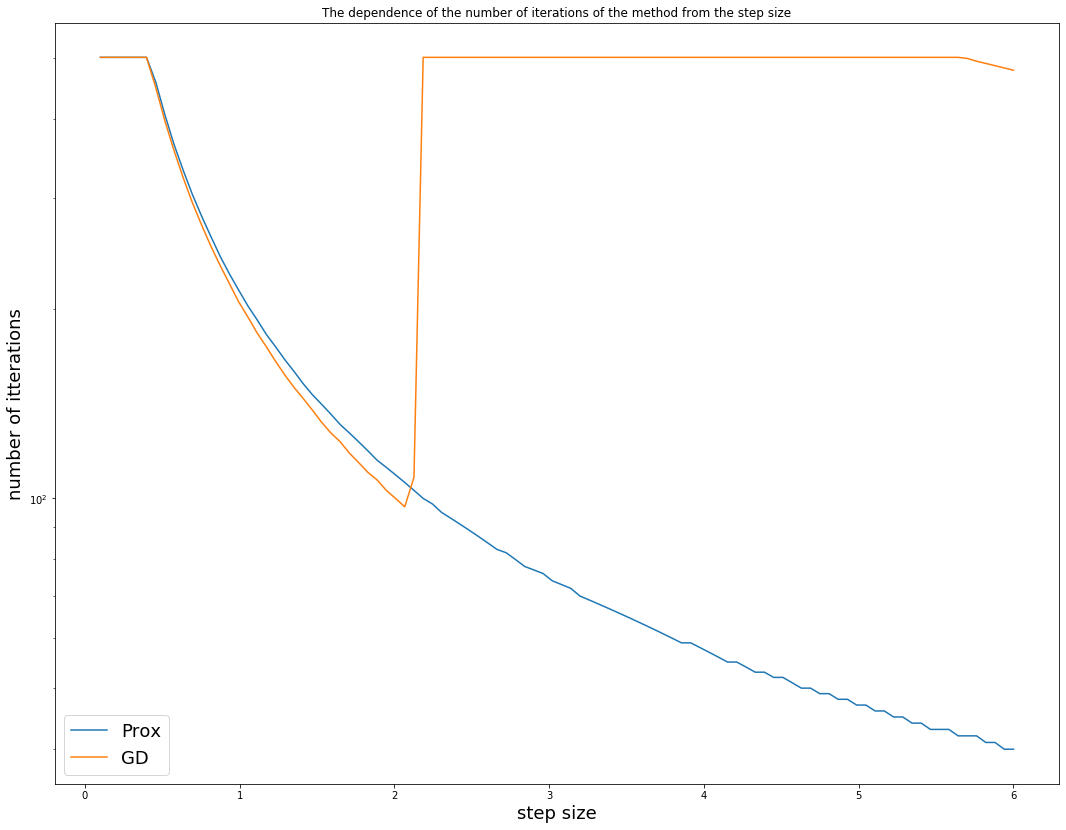

In [127]:
plt.figure(figsize=(18,14))
plt.semilogy(alphas, iters_prox, label = 'Prox')
plt.semilogy(alphas, iters_gd, label = 'GD')
plt.legend(loc="best", fontsize=18)
plt.xlabel("step size", fontsize=18)
plt.ylabel("number of itterations", fontsize=18)
plt.title("The dependence of the number of iterations of the method from the step size")
plt.show()

In [0]:
def prox_alg_(f, f_grad, g_prox, x0, epsilon = 1e-4, num_iters = 500,beta=0.5, fix_lam=None, accel=False):
    conv = [x0]
    x = x0.copy()
    iters = 1
    norm = np.linalg.norm(grad_f(x0))
    if fix_lam is None:
        lam = 1.
    while norm > epsilon and iters<num_iters:
        z = g_prox(x, fix_lam)
        x = z.copy()
        conv.append(x)
        norm = np.linalg.norm(grad_f(x))
        iters+=1

In [0]:
def grad_descent_(x0, f,grad_f, alpha, num_iters = 500, epsilon = 1e-4):
  x = x0.copy()
  norm = np.linalg.norm(grad_f(x0))
  norms = []
  iters = 0
  norms.append(x0)
  while norm > epsilon and iters < num_iters:
    x = x - grad_f(x)*alpha
    norm = np.linalg.norm(grad_f(x))
    norms.append(x)
    iters = iters+1

In [130]:
for alpha in steps:
  print(alpha)
  %timeit prox_alg_(f, grad_f, g_prox, x0, fix_lam = alpha)
  %timeit grad_descent_(x0, f,grad_f, alpha)


1
100 loops, best of 3: 16.1 ms per loop
100 loops, best of 3: 2.92 ms per loop
2
100 loops, best of 3: 8.32 ms per loop
1000 loops, best of 3: 1.43 ms per loop
3
100 loops, best of 3: 5.61 ms per loop
100 loops, best of 3: 7.04 ms per loop
10
100 loops, best of 3: 1.91 ms per loop


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in multiply
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in matmul
  # Remove the CWD from sys.path while we load stuff.


100 loops, best of 3: 4.85 ms per loop
